In [167]:
import pandas as pd
import matplotlib.pyplot as plt

## Put raw data together

In [2]:
#Load Raw Data

df_Dec_1 = pd.read_csv('Dataset/Twitter_Dec_1.csv')
df_Dec_2 = pd.read_csv('Dataset/Twitter_Dec_2.csv')
df_Dec_3 = pd.read_csv('Dataset/Twitter_Dec_3.csv')
df_Dec_4 = pd.read_csv('Dataset/Twitter_Dec_4.csv')
df_Dec_5 = pd.read_csv('Dataset/Twitter_Dec_5.csv')
df_Dec_6 = pd.read_csv('Dataset/Twitter_Dec_6.csv')
df_Jan_1 = pd.read_csv('Dataset/Twitter_Jan_1.csv')
df_Jan_2 = pd.read_csv('Dataset/Twitter_Jan_2.csv')
df_Jan_3 = pd.read_csv('Dataset/Twitter_Jan_3.csv', dtype = {0:object, 2:object})
df_Jan_4 = pd.read_csv('Dataset/Twitter_Jan_4.csv')
df_Jan_5 = pd.read_csv('Dataset/Twitter_Jan_5.csv')
df_Jan_6 = pd.read_csv('Dataset/Twitter_Jan_6.csv', dtype = {0:object, 2:object})
df_Jan_7 = pd.read_csv('Dataset/Twitter_Jan_7.csv')
df_Jan_8 = pd.read_csv('Dataset/Twitter_Jan_8.csv')
df_Jan_9 = pd.read_csv('Dataset/Twitter_Jan_9.csv')
df_Jan_10 = pd.read_csv('Dataset/Twitter_Jan_10.csv')

In [3]:
#Combine all data from December into a dataframe
df_Dec= pd.concat([df_Dec_1, df_Dec_2, df_Dec_3, df_Dec_4, df_Dec_5, df_Dec_6])
df_Jan = pd.concat([df_Jan_1, df_Jan_2, df_Jan_3,df_Jan_4, df_Jan_5, df_Jan_6,df_Jan_7,df_Jan_8,df_Jan_9,df_Jan_10])

In [4]:
df_Dec.shape, df_Jan.shape

((511917, 9), (808919, 9))

In [5]:
#Remove duplicates
df_Dec = df_Dec.drop_duplicates()
df_Jan = df_Jan.drop_duplicates()
df_Dec.shape, df_Jan.shape

((474572, 9), (780946, 9))

In [6]:
df_Dec = df_Dec.reset_index(drop=True)
df_Jan = df_Jan.reset_index(drop=True)

In [7]:
df_Dec.to_csv("Twitter_Dec_overall.csv", index=False)
df_Jan.to_csv("Twitter_Jan_overall.csv", index=False)

In [8]:
#Combine December and January Data together
df = pd.concat([df_Jan, df_Dec])

In [9]:
df = df.reset_index(drop=True)
df.head()

,UserId,UserName,Verified,Location,Followers,Tweet,Timestamp,Retweeted,Language
0,1620210123732828162,Erban_legend_,False,"Chicago, IL",763.0,ChatGPT is basically the best unpaid intern to...,2023-01-30 23:59:30+00:00,NaN,en
1,1620210123456270336,doomoog,False,NaN,60.0,@jeffersonmorley @ChatGPT @OpenAI It pulled th...,2023-01-30 23:59:30+00:00,NaN,en
2,1620210110240034819,yanhaica1,False,"Toronto, on, Canada",1493.0,#ChatGPT is down for me since yesterday. Is it...,2023-01-30 23:59:26+00:00,NaN,en
3,1620210048281776130,yasegumi,False,NaN,273.0,@GalorOded ChatGPT is literally the marriage o...,2023-01-30 23:59:12+00:00,NaN,en
4,1620210039570022401,datos_digital,False,Australia,6385.0,ChatGPT Is Making Universities Rethink Plagiar...,2023-01-30 23:59:10+00:00,NaN,en


## Clean data for EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255518 entries, 0 to 1255517
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   UserId     1255518 non-null  object 
 1   UserName   1255514 non-null  object 
 2   Verified   1255509 non-null  object 
 3   Location   896379 non-null   object 
 4   Followers  1255507 non-null  float64
 5   Tweet      1255508 non-null  object 
 6   Timestamp  1255501 non-null  object 
 7   Retweeted  0 non-null        float64
 8   Language   1255501 non-null  object 
dtypes: float64(2), object(7)
memory usage: 86.2+ MB


In [11]:
#Drop the retweeted column
df.drop(columns='Retweeted', inplace = True)

In [12]:
#Divide the datetime columns into two separate columns
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
df['Time_of_the_day'] = df['Timestamp'].dt.time

In [13]:
df[df['Timestamp'].isna()]

,UserId,UserName,Verified,Location,Followers,Tweet,Timestamp,Language,Date,Time_of_the_day
13609,1619958101599457282,billnco,False,NaN,127.0,https://t.co/0hPBv1VRTc is now available for sale,NaT,NaN,NaT,NaT
13610,#Apollo #Apollos #protocol #Web3 #Metaverse #n...,2023-01-30 07:18:03+00:00,NaN,en,NaN,NaN,NaT,NaN,NaT,NaT
41217,1620363648358318080,billnco,False,NaN,127.0,https://t.co/nMQ0byRYaB is now available for sale,NaT,NaN,NaT,NaT
41218,#Python #Micropython #protocol #Web3 #Metavers...,2023-01-31 10:09:33+00:00,NaN,en,NaN,NaN,NaT,NaN,NaT,NaT
52609,1620209645104287744,shupei1213,False,SF┃学習欲,NaN,NaN,NaT,NaN,NaT,NaT
52610,/達成欲,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT
52611,/戦略性,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT
52612,/責任感,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT
52613,/内省,1336,米バズフィードがChatGPTで記事作成へ\n\nここ数ヶ月、世の中へものすごいスピードで普...,2023-01-30 23:57:36+00:00,NaN,ja,NaT,NaN,NaT,NaT
183158,1620000000000000000.0,billnco,False,NaN,127.0,https://t.co/AaySmEnHIV is now available for sale,NaT,NaN,NaT,NaT


In [32]:
#Remove missing values
df.dropna(subset=['Timestamp'], inplace = True)

In [36]:
#Drop the timestamp column
df = df.drop('Timestamp', axis=1)

In [37]:
df.reset_index(drop=True, inplace=True)

In [38]:
# Save data for EDA 
df.to_csv('Twitter_EDA.csv', index = False)

## Data Preprocessing (english tweets only)

In [73]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [132]:
df_en = df[df['Language']=='en'].reset_index(drop=True)
df_en.shape

(832924, 9)

In [133]:
df_en = df_en.drop(columns = ['Language'])

In [134]:
#Remove URL from tweet text
df_en['Tweet'] = df_en['Tweet'].apply(lambda x: re.sub(r'http\S+', '',x))
#Remove mention (@user)
df_en['Tweet'] = df_en['Tweet'].apply(lambda x: re.sub(r'@\w+', '',x))
#All lowercases
df_en['Tweet'] = df_en['Tweet'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
#Remove Punctuation
df_en['Tweet_punc'] = df_en['Tweet'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [135]:
#Replace 'chat gpt' with 'chatgpt'
df_en['Tweet_punc'] = df_en['Tweet_punc'].apply(lambda x: re.sub(r'chat gpt', 'chatgpt', x))

### Remove stopwords

In [136]:
# install NLTK
#!pip install nltk

In [137]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hxyco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
stop = stopwords.words('english')
df_en['Tweet_stop'] = df_en['Tweet_punc'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

### Tokenization

In [139]:
df_en['Tweet_tokenized'] = df_en['Tweet_stop'].apply(lambda x: re.split('\W+', x))

### Lemmatization

In [140]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hxyco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hxyco\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [141]:
from nltk import pos_tag
from nltk.corpus import wordnet

In [142]:
#define a function to map POS tags from treebank tag into wordnet tags
wnl = WordNetLemmatizer()
def get_wordnet(pos):
    if pos.startswith('N'): 
        return wordnet.NOUN
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN     #default to noun if no match

    
# Define a function to tag and lemmatize a text string    
def lemmatizer(text):
    pos_tags = pos_tag(text)
    text = [wnl.lemmatize(word, pos = get_wordnet(pos)) for word, pos in pos_tags]
    return text

df_en['Tweet_lemmatized'] = df_en['Tweet_tokenized'].apply(lambda x: lemmatizer(x))

In [143]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install --upgrade dataclasses
#import spacy
# try spacy lemmatizer
###
def spacy_lemmatizer(text):
    # only need tagger, no need for parser and named entity recognizer, for faster implementation
    nlp = spacy.load('en_core_web_sm')
    allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']
    doc = nlp(' '.join(text))
    lemmas = [token.lemma_ for token in doc]
    return lemmas
#df_en['Tweet_lemmatized_spacy'] = df_en['Tweet_tokenized'].apply(lambda x: spacy_lemmatizer(x))
###

In [162]:
df_en

,UserId,UserName,Verified,Location,Followers,Tweet,Date,Time_of_the_day,Tweet_punc,Tweet_stop,Tweet_tokenized,Tweet_lemmatized
0,1.620210e+18,Erban_legend_,False,"Chicago, IL",763.0,chatgpt is basically the best unpaid intern to...,2023-01-30,23:59:30,chatgpt is basically the best unpaid intern to...,chatgpt basically best unpaid intern ever exist,"[chatgpt, basically, best, unpaid, intern, eve...","[chatgpt, basically, best, unpaid, intern, eve..."
1,1.620210e+18,doomoog,False,NaN,60.0,it pulled this on me though:,2023-01-30,23:59:30,it pulled this on me though,pulled though,"[pulled, though]","[pull, though]"
2,1.620210e+18,yanhaica1,False,"Toronto, on, Canada",1493.0,#chatgpt is down for me since yesterday. is it...,2023-01-30,23:59:26,chatgpt is down for me since yesterday is it o...,chatgpt since yesterday,"[chatgpt, since, yesterday]","[chatgpt, since, yesterday]"
3,1.620210e+18,yasegumi,False,NaN,273.0,chatgpt is literally the marriage of madlibs t...,2023-01-30,23:59:12,chatgpt is literally the marriage of madlibs t...,chatgpt literally marriage madlibs monte carlo...,"[chatgpt, literally, marriage, madlibs, monte,...","[chatgpt, literally, marriage, madlibs, monte,..."
4,1.620210e+18,datos_digital,False,Australia,6385.0,chatgpt is making universities rethink plagiar...,2023-01-30,23:59:10,chatgpt is making universities rethink plagiar...,chatgpt making universities rethink plagiarism...,"[chatgpt, making, universities, rethink, plagi...","[chatgpt, make, university, rethink, plagiaris..."
...,...,...,...,...,...,...,...,...,...,...,...,...
832919,1.598105e+18,TimothyKassis,False,"Boston, MA",946.0,me: can you give me a sensationalist headline ...,2022-12-01,00:02:43,me can you give me a sensationalist headline s...,give sensationalist headline saying british ro...,"[give, sensationalist, headline, saying, briti...","[give, sensationalist, headline, say, british,..."
832920,1.598105e+18,goodside,False,"Richmond, VA",40296.0,openai’s new chatgpt seems to be trained again...,2022-12-01,00:01:53,openais new chatgpt seems to be trained agains...,openais new chatgpt seems trained prompt injec...,"[openais, new, chatgpt, seems, trained, prompt...","[openais, new, chatgpt, seem, trained, prompt,..."
832921,1.598105e+18,lingzhong_eth,False,⛓,167.0,i asked #chatgpt “is covid lockdown good or ba...,2022-12-01,00:01:15,i asked chatgpt is covid lockdown good or bad ...,asked chatgpt covid lockdown good bad got back...,"[asked, chatgpt, covid, lockdown, good, bad, g...","[ask, chatgpt, covid, lockdown, good, bad, get..."
832922,1.598105e+18,bitchrate,False,kha\vivian \\ it\its,251.0,chatgpt is really cool but man saying shit to ...,2022-12-01,00:00:28,chatgpt is really cool but man saying shit to ...,chatgpt really cool man saying shit computer r...,"[chatgpt, really, cool, man, saying, shit, com...","[chatgpt, really, cool, man, say, shit, comput..."


In [161]:
#Remove columns not needed.
df_en_clean = df_en.drop(columns=['Tweet', 'Tweet_punc', 'Tweet_stop', 'Tweet_tokenized'])

In [163]:
df_en_clean['Tokens'] = df_en_clean['Tweet_lemmatized'].apply(lambda x: ' '.join(x))

In [165]:
df_en_clean.to_csv('Twitter_eng_clean.csv', index=False)

### WordCloud

In [170]:
#!pip install wordcloud
#!pip install numpy matplotlib pillow
import numpy as np
import PIL.Image

In [166]:
from wordcloud import WordCloud
#prepare the long_string for wordcloud
long_string = ' '.join(list(df_en_clean['Tokens']))

In [257]:
def wordcloud_generate(string):
#load the mask image
    mask = np.array(PIL.Image.open('chatgpt3.png'))

    #define the wordcloud object
    wordcloud = WordCloud(scale =1,
                          mask = mask, 
                          background_color='white',
                          max_words=200,
                          contour_width=1,
                          contour_color='#74aa9c',
                         colormap='gist_earth',
                         stopwords=['chatgpt'])

    #generate the wordcloud
    wc = wordcloud.generate(string)

    #display the wordcloud
    fig = plt.figure(figsize=(12,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

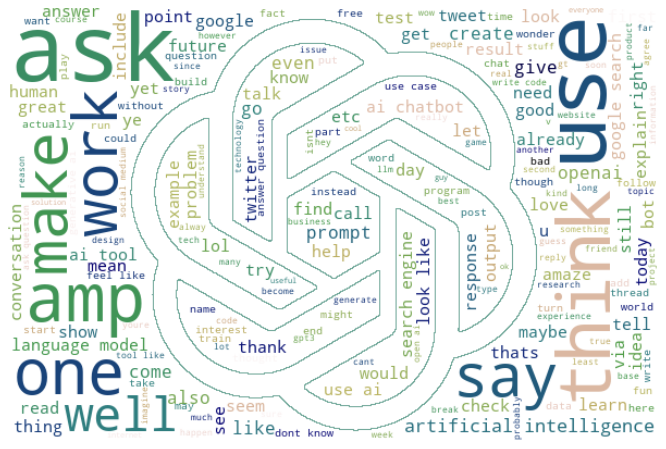

In [258]:
wordcloud_generate(long_string)